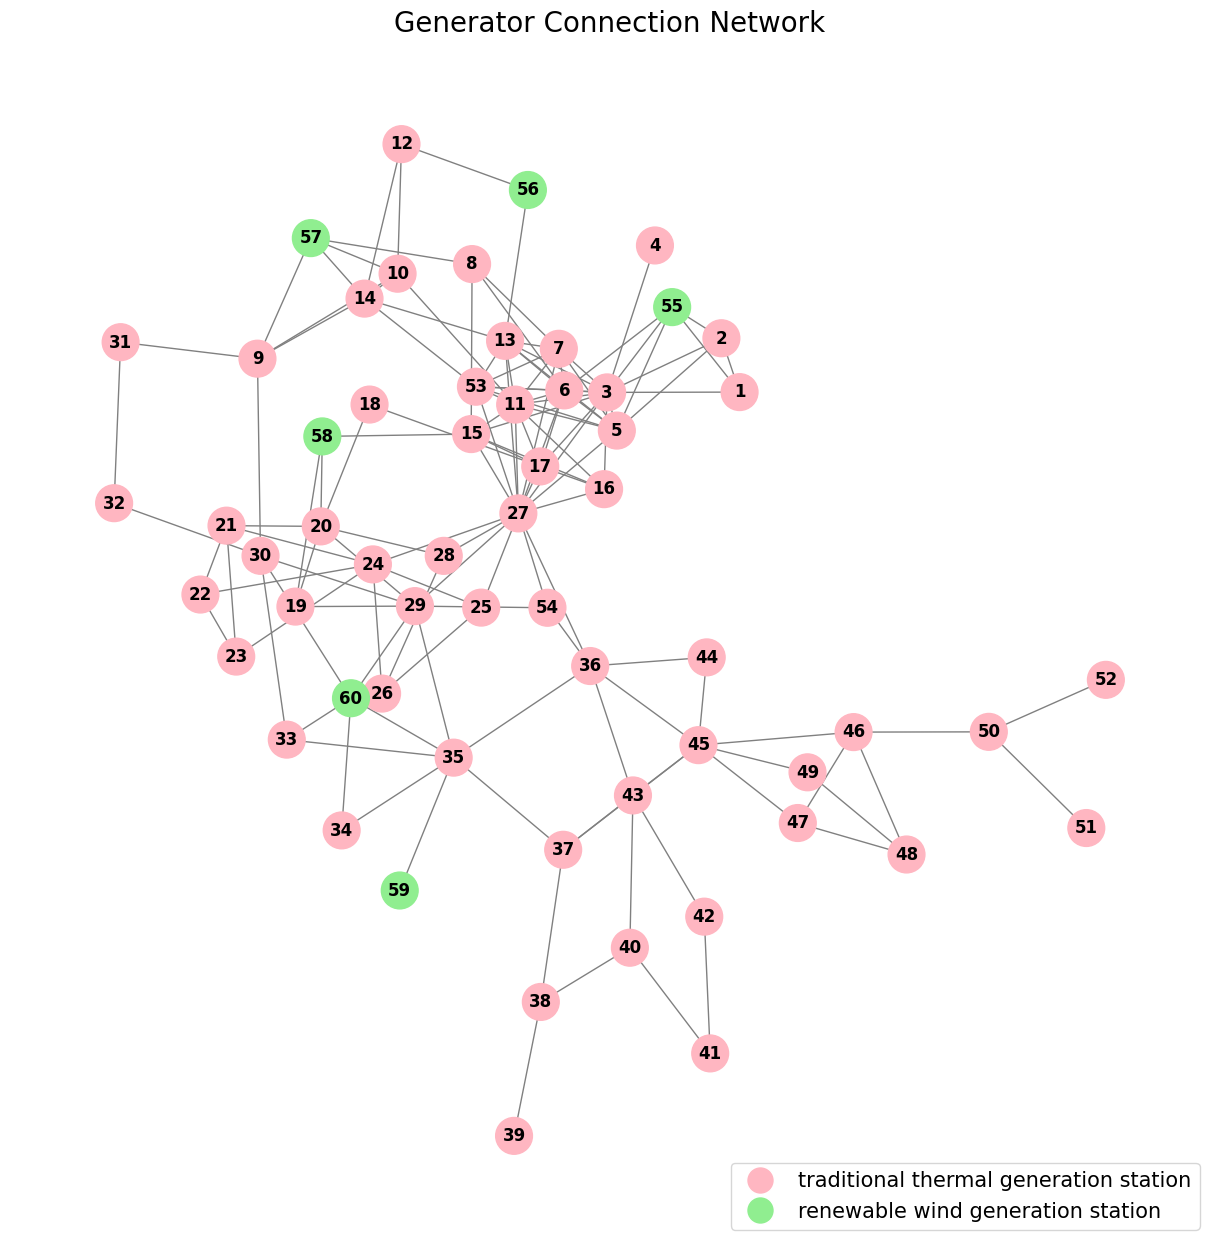

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

generator_bus_df = pd.read_excel('./real-data/wind-generator-bus.xlsx')
transmission_line_df = pd.read_excel('./real-data/transmission line data.xlsx')

# Rename columns for clarity
generator_bus_df.columns = ['Generator', 'Bus']
transmission_line_df.columns = transmission_line_df.iloc[0]
transmission_line_df = transmission_line_df.drop(0)

# Convert columns to appropriate types
generator_bus_df['Generator'] = generator_bus_df['Generator'].astype(int)
generator_bus_df['Bus'] = generator_bus_df['Bus'].astype(int)
transmission_line_df['From Bus'] = transmission_line_df['From Bus'].astype(int)
transmission_line_df['To Bus'] = transmission_line_df['To Bus'].astype(int)

# Construct undirected graph for bus connections
G_bus = nx.Graph()
G_bus.add_edges_from(zip(transmission_line_df['From Bus'], transmission_line_df['To Bus']))

# Extract set of buses with generators
generator_buses = set(generator_bus_df['Bus'])

# Function to check if two buses are connected via other buses without generators
def are_generators_connected(bus1, bus2):
    try:
        path = nx.shortest_path(G_bus, source=bus1, target=bus2)
        for bus in path:
            if bus != bus1 and bus != bus2 and bus in generator_buses:
                return False
        return True
    except nx.NetworkXNoPath:
        return False

# Construct undirected graph for generator connections
G_gen = nx.Graph()
generators = generator_bus_df['Generator'].tolist()

for i, gen1 in enumerate(generators):
    for gen2 in generators[i+1:]:
        bus1 = generator_bus_df.loc[generator_bus_df['Generator'] == gen1, 'Bus'].values[0]
        bus2 = generator_bus_df.loc[generator_bus_df['Generator'] == gen2, 'Bus'].values[0]
        if are_generators_connected(bus1, bus2):
            G_gen.add_edge(gen1, gen2)

# Ensure generator nodes are sorted by generator number
generators_sorted = generators

# Define node colors
node_colors = ['lightgreen' if i == 3 or i == 16 or i == 23 or i == 24 or i == 39 or i == 44 else 'lightpink' for i in range(len(generators_sorted))]

# Create node labels dictionary
labels = {gen: gen for gen in generators_sorted}

# Plot the graph
plt.figure(figsize=(12, 12))

# Adjust layout to kamada_kawai_layout for more even distribution
pos = nx.kamada_kawai_layout(G_gen)

nx.draw(G_gen, pos, with_labels=True, labels=labels, node_color=node_colors, edge_color='gray', node_size=700, font_size=12, font_weight='bold')

# Create legend
red_circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='lightpink', markersize=20, label='traditional thermal generation station')
green_circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=20, label='renewable wind generation station')
plt.legend(handles=[red_circle, green_circle], fontsize=15, loc='lower right')

plt.title("Generator Connection Network", fontsize=20)

# Show plot
plt.show()

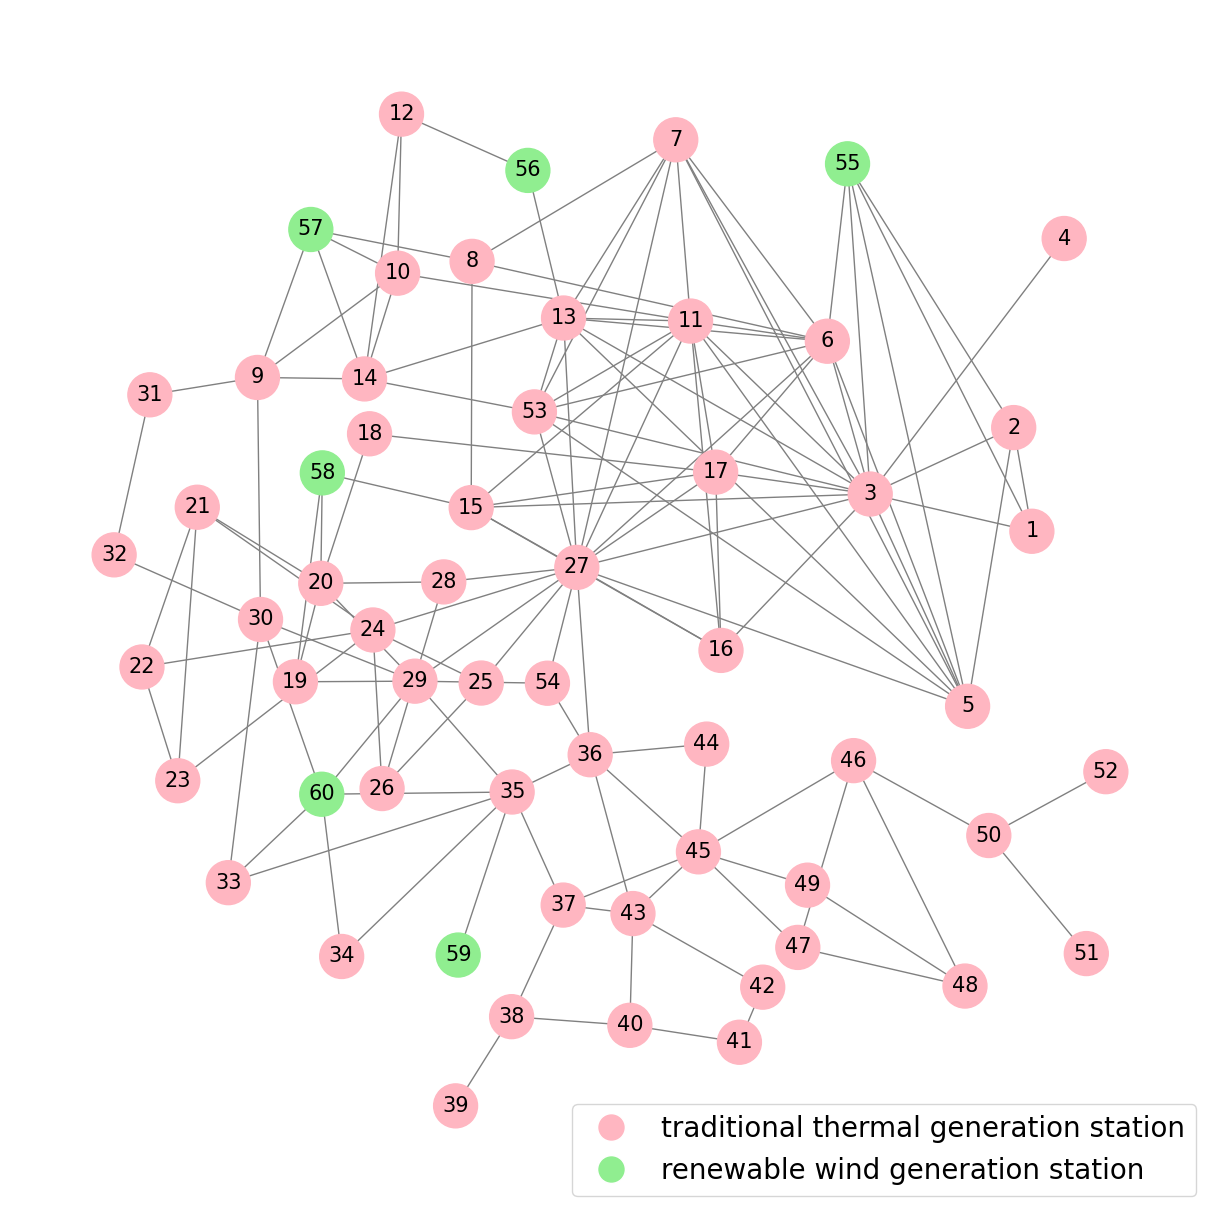

In [133]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the data from the provided Excel files
generator_bus_df = pd.read_excel('./real-data/wind-generator-bus.xlsx')
transmission_line_df = pd.read_excel('./real-data/transmission line data.xlsx')

# Rename columns for clarity
generator_bus_df.columns = ['Generator', 'Bus']
transmission_line_df.columns = transmission_line_df.iloc[0]
transmission_line_df = transmission_line_df.drop(0)

# Convert columns to appropriate types
generator_bus_df['Generator'] = generator_bus_df['Generator'].astype(int)
generator_bus_df['Bus'] = generator_bus_df['Bus'].astype(int)
transmission_line_df['From Bus'] = transmission_line_df['From Bus'].astype(int)
transmission_line_df['To Bus'] = transmission_line_df['To Bus'].astype(int)

# Construct undirected graph for bus connections
G_bus = nx.Graph()
G_bus.add_edges_from(zip(transmission_line_df['From Bus'], transmission_line_df['To Bus']))

# Extract set of buses with generators
generator_buses = set(generator_bus_df['Bus'])

# Function to check if two buses are connected via other buses without generators
def are_generators_connected(bus1, bus2):
    try:
        path = nx.shortest_path(G_bus, source=bus1, target=bus2)
        for bus in path:
            if bus != bus1 and bus != bus2 and bus in generator_buses:
                return False
        return True
    except nx.NetworkXNoPath:
        return False

# Construct undirected graph for generator connections
G_gen = nx.Graph()
generators = generator_bus_df['Generator'].tolist()

for i, gen1 in enumerate(generators):
    for gen2 in generators[i+1:]:
        bus1 = generator_bus_df.loc[generator_bus_df['Generator'] == gen1, 'Bus'].values[0]
        bus2 = generator_bus_df.loc[generator_bus_df['Generator'] == gen2, 'Bus'].values[0]
        if are_generators_connected(bus1, bus2):
            G_gen.add_edge(gen1, gen2)

# Ensure generator nodes are sorted by generator number
generators_sorted = generators

# Define node colors
node_colors = ['lightgreen' if i == 3 or i == 16 or i == 23 or i == 24 or i == 39 or i == 44 else 'lightpink' for i in range(len(generators_sorted))]

# Create node labels dictionary
labels = {gen: gen for gen in generators_sorted}

# Plot the graph
plt.figure(figsize=(12, 12))

# Adjust layout to kamada_kawai_layout for more even distribution
pos = nx.kamada_kawai_layout(G_gen)

# Manually set node positions based on the kamada_kawai_layout
# Move node 3 slightly to the right and up
pos[53] = (pos[53][0] + 0.1, pos[53][1])
# Move node 5 slightly to the left and down
pos[15] = (pos[15][0], pos[15][1]-0.05)
# Move node 4 to the right
pos[13] = (pos[13][0] + 0.1, pos[13][1]+0.05)
# Move node 55 slightly to the right and up
pos[11] = (pos[11][0] + 0.2, pos[11][1])
# Move node 2 to the left
pos[27] = (pos[27][0] + 0.1, pos[27][1])
# Move node 1 down
pos[17] = (pos[17][0]+ 0.3, pos[17][1]+0.05)
pos[7] = (pos[7][0]+ 0.2, pos[7][1]+0.3)
pos[6] = (pos[6][0]+ 0.45, pos[6][1]+0.1)
pos[3] = (pos[3][0]+ 0.45, pos[3][1]-0.1)
pos[5] = (pos[5][0]+ 0.6, pos[5][1]-0.32)
pos[16] = (pos[16][0]+ 0.2, pos[16][1]-0.15)
pos[4] = (pos[4][0]+ 0.7, pos[4][1])
pos[14] = (pos[14][0], pos[14][1]-0.1)
pos[55] = (pos[55][0]+ 0.3, pos[55][1]+0.2)
pos[2] = (pos[2][0]+ 0.5, pos[2][1]-0.1)
pos[1] = (pos[1][0]+ 0.5, pos[1][1]-0.15 )
pos[11] = (pos[11][0]+ 0.1, pos[11][1]+0.15 )
pos[31] = (pos[31][0]+ 0.05, pos[31][1]-0.05 )
pos[33] = (pos[33][0]- 0.1, pos[33][1]-0.05 )
pos[22] = (pos[22][0]- 0.1, pos[22][1] )
pos[21] = (pos[21][0]- 0.05, pos[21][1]+0.1 )
pos[23] = (pos[23][0]- 0.1, pos[23][1]-0.05 )
pos[28] = (pos[28][0], pos[28][1]+0.05 )
pos[60] = (pos[60][0]- 0.05, pos[60][1] )
pos[39] = (pos[39][0]- 0.1, pos[39][1]+0.3 )
pos[38] = (pos[38][0]-0.05, pos[38][1]+0.2 )
pos[42] = (pos[42][0]+ 0.1, pos[42][1]+0.1)
pos[41] = (pos[41][0]+ 0.05, pos[41][1]+0.25)
pos[46] = (pos[46][0], pos[46][1]+0.1)
pos[48] = (pos[48][0]+0.1, pos[48][1])
pos[35] = (pos[35][0]+0.1, pos[35][1]+0.1)
pos[59] = (pos[59][0]+0.1, pos[59][1]+0.1)
pos[37] = (pos[37][0], pos[37][1]+0.1)
pos[40] = (pos[40][0], pos[40][1]+0.1)

nx.draw(G_gen, pos, with_labels=True, labels=labels, node_color=node_colors, edge_color='gray', node_size=1000, font_size=15)

# Create legend
red_circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='lightpink', markersize=20, label='traditional thermal generation station')
green_circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=20, label='renewable wind generation station')
plt.legend(handles=[red_circle, green_circle], fontsize=20, loc='lower right')

#plt.title("Generator Connection Network", fontsize=20)

plt.savefig('./figures/01-network.pdf',format='pdf', bbox_inches='tight')
plt.savefig('./figures/01-network.png',format='png', bbox_inches='tight')

# Show plot
plt.show()